## Содержание:
* [1. Подготовка данных](#section_1)
* [2. Статистика по годам](#section_2)

In [74]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

In [2]:
# init_df - датафрейм в исходном виде
init_df = pd.read_csv('datasets/games.csv')

# df - датафрейм для преобразований
df = pd.read_csv('datasets/games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных <a class="anchor" id="section_1"></a>

In [4]:
# Привожу названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Год выпуска не указан менее чем в 2% случаев, тратить время на их заполнение неэффективно. А вот с `user_score` придется поразбираться:

In [6]:
# Строки с подозриельтым значением
df[df['user_score']=='tbd'].shape

(2424, 11)

Интернет сообщает, что отметка `tbd` выставляется в рейтенге у игр, на которые еще не собрано достаточно отзывов. Заменю эти значения на NaN, поскольку они ненесут для меня полезной информации:

In [7]:
# Преобразую в числовой тип
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Преобразую в целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Проверка
print(df['user_score'].dtype, df['year_of_release'].dtype)

float64 Int64


In [8]:
# Cуммарные продажи во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

# Проверка
df[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,total_sales
0,41.36,28.96,3.77,74.09
1,29.08,3.58,6.81,39.47
2,15.68,12.76,3.79,32.23
3,15.61,10.93,3.28,29.82
4,11.27,8.89,10.22,30.38


- Названия колонок приведены к нижнему регистру
- В колонке 'user_score' значения `tbd` заменены на NaN, а тип данных на float64
- Тип данных 'year_of_release' теперь целочисленный, так будет удобно строить гистограммы
- Отметка `tbd` выставляется в рейтенге у игр, на которые еще не собрано достаточно отзывов
- Вычислены суммарные продажи во всех регионах

## Статистика по годам <a class="anchor" id="section_2"></a>

_Количество выпущенных игр_

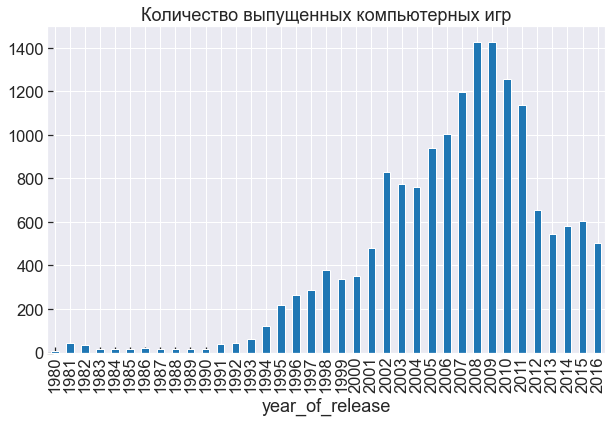

In [9]:
df.groupby('year_of_release')['name'].count().plot.bar()

plt.title('Количество выпущенных компьютерных игр')

plt.show()

- Игры, выпущенные раньше 1991 года, можно будет объеденить в одну группу. Их количество исчезающе мало по сравнению с периодом после. Наблюдается подозрительный спад количества выпускаемых игр начиная с 2009 года. Предположительно это связано с развитием индустрии мобильных игр.

_Продажи на разных платформах_

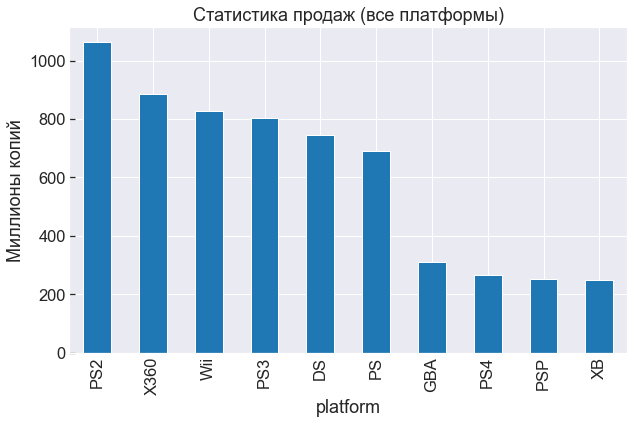

In [10]:
# Выберите платформы с наибольшими суммарными продажами
top_sales_platforms = df.groupby('platform')['total_sales'].sum().nlargest(10)

plt.ylabel('Миллионы копий')

plt.title('Статистика продаж (все платформы)')

top_sales_platforms.plot.bar()

plt.show()

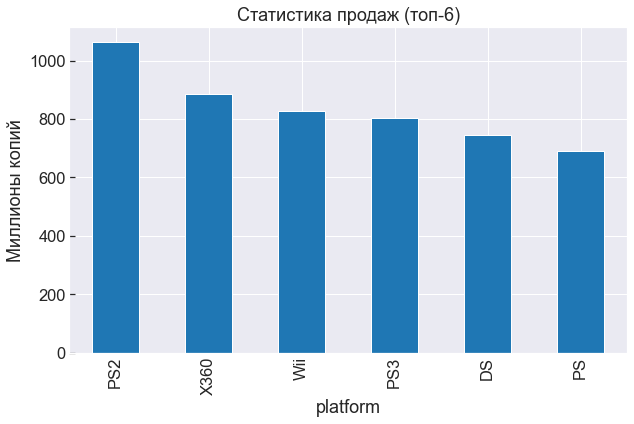

In [11]:
# Ограничусь шестью самыми крупными по прадажам
top_sales_platforms = df.groupby('platform')['total_sales'].sum().nlargest(6)

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж (топ-6)')

top_sales_platforms.plot.bar()

plt.show()

In [12]:
top_names = list(top_sales_platforms.index)

# Добавляю PC для сравнения
top_names.append('PC')

print(top_names)

top_sales_df = df[df['platform'].isin(top_names)]

top_sales_df.shape

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'PC']


(10396, 12)

In [13]:
top_sales_groups = top_sales_df.groupby(['platform', 'year_of_release'])['total_sales'].agg(('sum'))

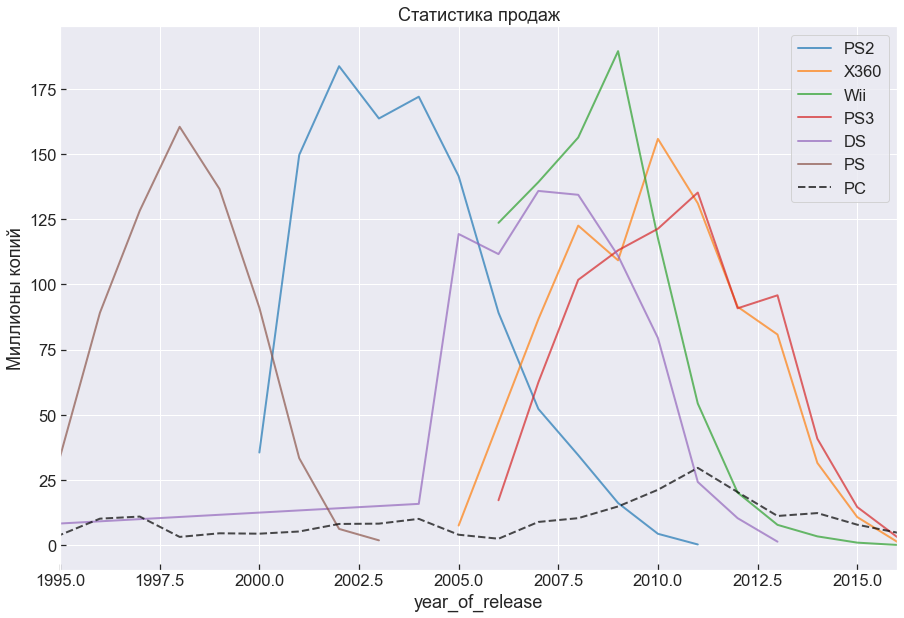

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

for platform_name in top_sales_platforms.index:

    stat_df = top_sales_groups.loc[[platform_name]].reset_index(level=0, drop=True)

    stat_df.plot(ax=ax, alpha=.7, lw=2, label=platform_name)

stat_df = top_sales_groups.loc[['PC']].reset_index(level=0, drop=True)
stat_df.plot(ax=ax, alpha=.7, lw=2, label='PC', color='k', ls='--')

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж')

plt.xlim(1995, 2016)
plt.legend()
plt.show()

- Актуальный период, данные за который помогут построить прогноз на 2017 год: 2012 - 2016
> Обоснование: , поэтому данные по этому периоду я не буду принимать во внимание в дальнейшем. Тем не менее, данные даже за этот период согласуются с утверждением о том, что

- Характерный срок, за который возникают и исчезают платформы состовляет около семи лет. Кроме того, есть ощущение, что с течением времени платформы начинают устаревать быстрее (см. график ниже).

***

***

In [15]:
# Данные для формирования прогноза на 2017 год

limit_year = 2012

predict_df = df[df['year_of_release'] >= limit_year]

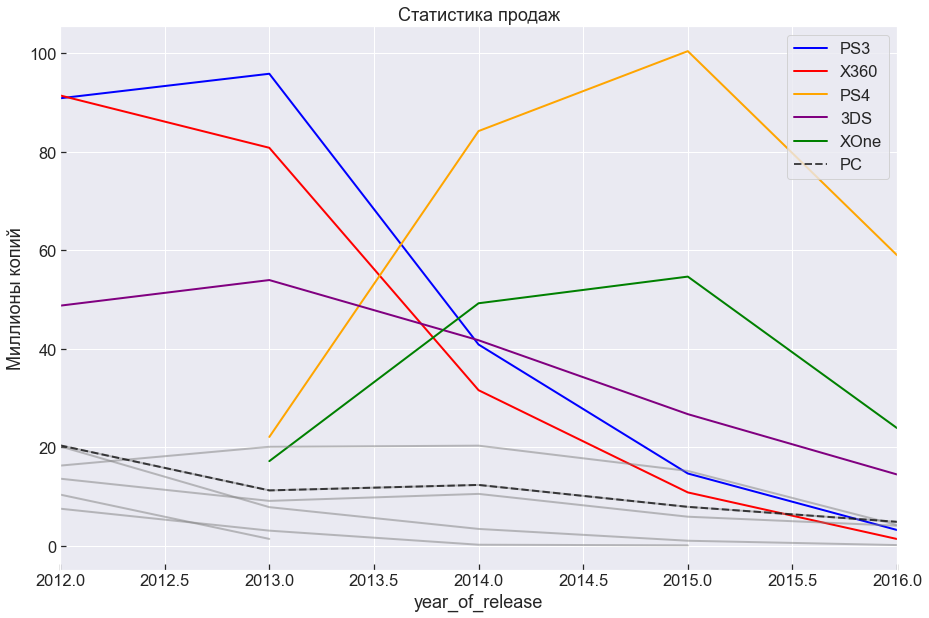

In [16]:
predict_stat_df = predict_df.groupby(['platform', 'year_of_release'])['total_sales'].agg(('sum'))

colors = ['blue', 'red', 'orange', 'purple', 'green', 'lime', 'yellow']

fig, ax = plt.subplots(figsize=(15, 10))

# Счетчик
i = 0

for platform_name in predict_df['platform'].unique():

    stat_df = predict_stat_df.loc[[platform_name]].reset_index(level=0, drop=True)
    stat_df = pd.DataFrame(stat_df)

    if stat_df['total_sales'].max() < 40:
        color='grey'
        platform_name=None
        alpha = .5
    else:
        color = colors[i]
        i+=1
        alpha = 1

    ax.plot(stat_df, lw=2, color=color, alpha=alpha, label=platform_name)
    ax.legend()


stat_df = predict_stat_df.loc[['PC']].reset_index(level=0, drop=True)
stat_df.plot(ax=ax, alpha=.7, lw=2, label='PC', color='k', ls='--')

ax.legend()

plt.ylabel('Миллионы копий')
plt.title('Статистика продаж')

plt.xlim(limit_year, 2016)
plt.legend()
plt.show()

- Для всех платформ наблюдается тенденция к уменьшению количества проданных копий
- При этом по количеству продаж лидируют PS4 и XOne
- Серыми линиями внизу показаны преимущественно портативные платформы (WiiU, DS и др.)
- Штриховой линией отмечены продажи игр на ПК

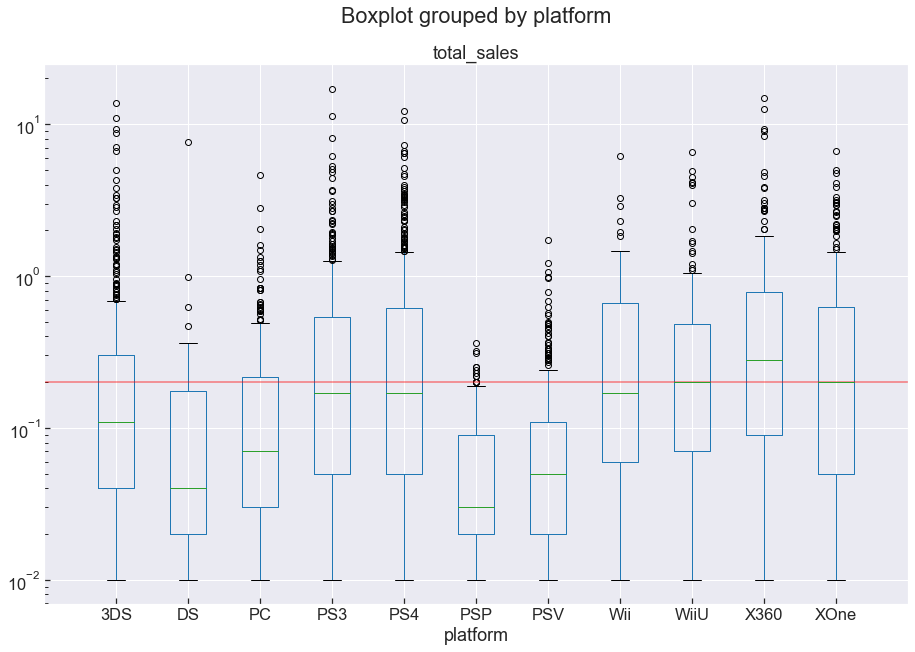

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

predict_df.boxplot('total_sales', by='platform', ax=ax)
ax.set_yscale('log')

ax.hlines(.2, 0, 13, color='red', alpha=.5)
ax.set_xlim(0, 12)

plt.show()

- По медианному количеству проданных копий различных игр лидируют платформы X360, XOne, PS3, PS4, Wii и WiiU

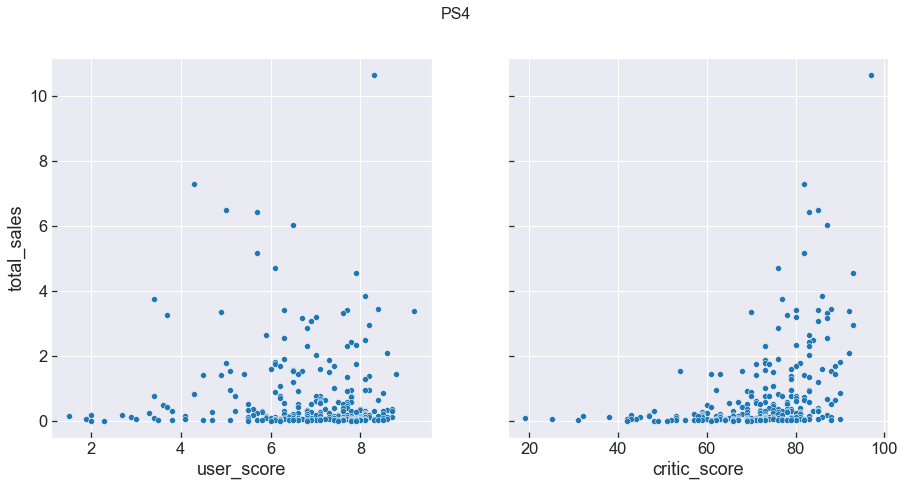

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

popular_platform = 'PS4'

ps4_df = predict_df[predict_df['platform']==popular_platform]

sns.scatterplot(data=ps4_df, x='user_score', y='total_sales', ax=ax1)
sns.scatterplot(data=ps4_df, x='critic_score', y='total_sales', ax=ax2)

fig.suptitle(f'{popular_platform}', fontsize=16)

plt.show()

In [20]:
user_pearson = ps4_df['user_score'].corr(ps4_df['total_sales'])
critic_pearson = ps4_df['critic_score'].corr(ps4_df['total_sales'])

print(f'Коэффициент корреляции между отзывами пользователей и количеством продаж: {user_pearson:.2f} (корреляция отсутствует)')
print(f'Коэффициент корреляции между отзывами пользователей и количеством продаж: {critic_pearson:.2f} (небольшая положительная корреляция)')

Коэффициент корреляции между отзывами пользователей и количеством продаж: -0.03 (корреляция отсутствует)
Коэффициент корреляции между отзывами пользователей и количеством продаж: 0.41 (небольшая положительная корреляция)


- Взаимосвязи между отзывами пользователей и количеством проданных копий игр для платформы PS4 не наблюдается <a class="anchor" id="ps4_corr"></a>
- Между отзывами критиков и количеством проданных копий игр для платформы PS4 наблюдается небольшая положительная корреляция

In [21]:
platform_list = predict_df['platform'].unique().tolist()

platform_list

['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP']

In [22]:
def corr_coeff(df, platforms, target_feature):
    """
    Выводит на экран коэффициенты корреляции Пирсона между
    `target_feature` и total_sales для заданного списка платформ

    Args:
        df: Данные
        platforms: Список интересующих платформ
        target_feature: Целевая характеристика
    """

    print(f'*** {target_feature} vs. total sales ***')
    print()

    for platform in platforms:

        platform_df = df[df['platform']==platform]
        corr = platform_df[target_feature].corr(platform_df['total_sales'])

        useful_data_shape = np.sum(~platform_df[target_feature].isna())
        print(f'| {platform} |', f'  pearson:', f'{corr:.2f};', f'  dots: {useful_data_shape}')

In [23]:
corr_coeff(df=predict_df, platforms=platform_list, target_feature='critic_score')

*** critic_score vs. total sales ***

| PS3 |   pearson: 0.33;   dots: 214
| X360 |   pearson: 0.36;   dots: 171
| PS4 |   pearson: 0.41;   dots: 252
| 3DS |   pearson: 0.32;   dots: 104
| DS |   pearson: nan;   dots: 1
| XOne |   pearson: 0.42;   dots: 169
| WiiU |   pearson: 0.35;   dots: 90
| Wii |   pearson: -0.42;   dots: 5
| PC |   pearson: 0.24;   dots: 198
| PSV |   pearson: 0.10;   dots: 107
| PSP |   pearson: nan;   dots: 1


/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
corr_coeff(df=predict_df, platforms=platform_list, target_feature='user_score')

*** user_score vs. total sales ***

| PS3 |   pearson: -0.01;   dots: 283
| X360 |   pearson: 0.01;   dots: 235
| PS4 |   pearson: -0.03;   dots: 257
| 3DS |   pearson: 0.20;   dots: 114
| DS |   pearson: 0.86;   dots: 3
| XOne |   pearson: -0.07;   dots: 182
| WiiU |   pearson: 0.40;   dots: 100
| Wii |   pearson: 0.30;   dots: 17
| PC |   pearson: -0.12;   dots: 206
| PSV |   pearson: 0.02;   dots: 130
| PSP |   pearson: -0.71;   dots: 4


- Для всех рассмотренных платформ соблюдаются закономерности, [сформулированные выше](#ps4_corr). Аномальные результаты видны там, где недостает данных для надежных статестических выводов

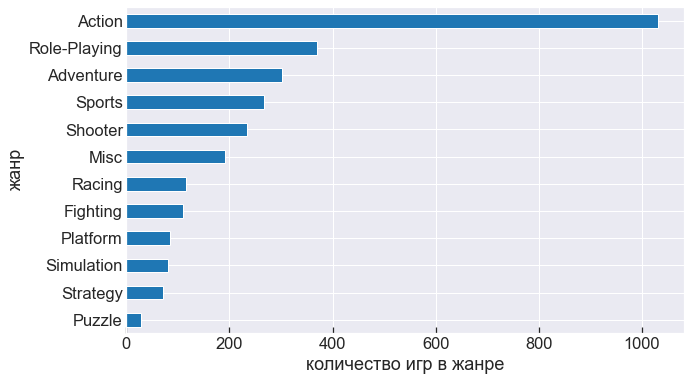

In [26]:
predict_df.value_counts('genre').sort_values().plot(kind='barh')

plt.xlabel('количество игр в жанре')
plt.ylabel('жанр')

plt.show()

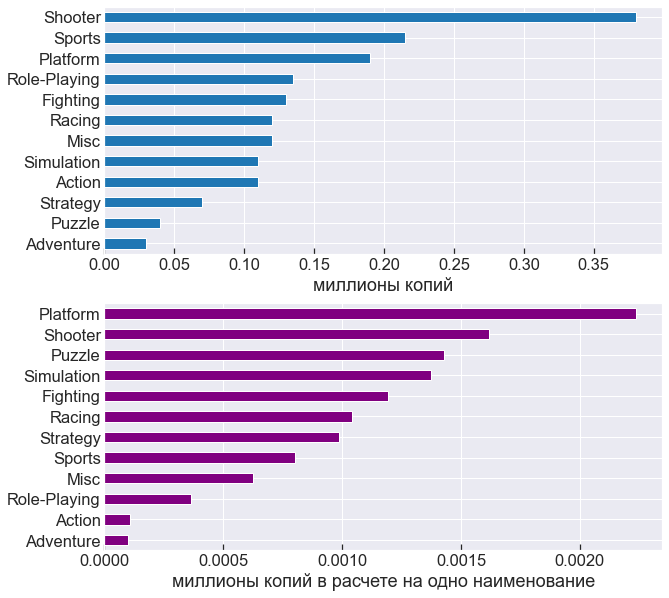

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

median_values = predict_df.groupby('genre')['total_sales'].median()
median_values.sort_values().plot(kind='barh', ax=ax1)

ax1.set_xlabel('миллионы копий')
ax1.set_ylabel(None)

copies_per_name = median_values / predict_df.groupby('genre')['name'].count()
copies_per_name.sort_values().plot(kind='barh', ax=ax2, color='purple')

ax2.set_xlabel('миллионы копий в расчете на одно наименование')
ax2.set_ylabel(None)

plt.show()

- Наибольшее количество различных наименований наблюдается в жанрах `Action`, `Role-Playing`, `Adventure` (здесь и ниже в порядке убывания).
- Больше всего копий продано в жанрах `Shooter`, `Sports`, `Platform`. Меньше всего -- в жанрах `Strategy`, `Puzzle`, `Adventure`.

`Комментарий к столбчатой диаграмме на нижней панели:` _Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?_

1. Предположим, что чем больше копий игры в некотром жанре продано, тем более прибыльный этот жанр
2. В некоторых жанрах количество уникальных наименований может быть небольшим, но игры при этом расходятся большим количеством копий. Такие жанры я буду называть "прибыльными". Возможна обратная ситуация: разных игр в жанре много, но расходятся по покупателям они плохо. В этих жанрах продажи будут низкими.

- Наибольшее количество копий в расчете на одно наименование продано в жанрах `Platform`, `Shooter`, `Puzzle`. Игры этих жанров продаются успешнее всего. Меньше всего копий на одно наименование продано в жанрах `Role-Playing`, `Action`, `Adventure`.

***

In [28]:
predict_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,11.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [30]:
platform_top = predict_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

platform_top

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


In [58]:
genres_top = predict_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

genres_top

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


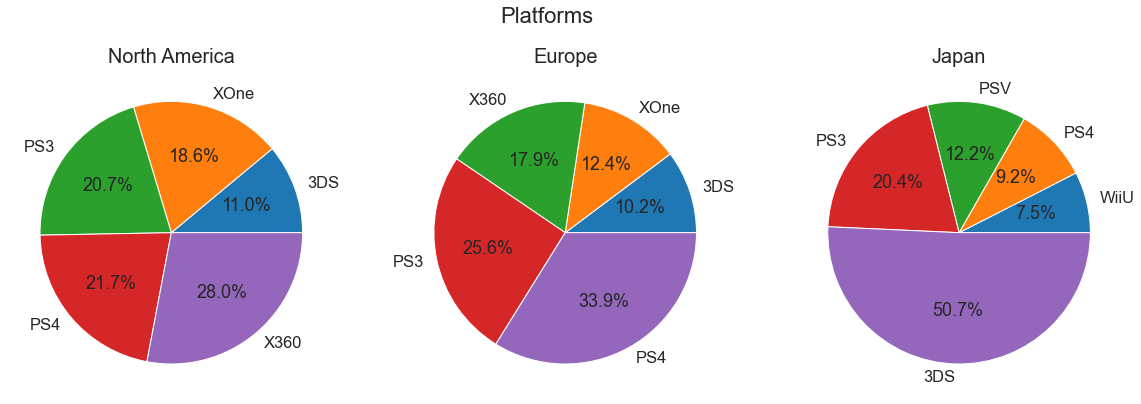

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

ax1, ax2, ax3 = axes

platform_top['na_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%', ax=ax1) 
ax1.set_title('North America', fontsize=20)
ax1.set_ylabel(None)

platform_top['eu_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Europe', fontsize=20)
ax2.set_ylabel(None)

platform_top['jp_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%', ax=ax3)
ax3.set_title('Japan', fontsize=20)
# ax3.set_xlabel('Millions of copies')
ax3.set_ylabel(None)

fig.suptitle('Platforms', fontsize=22, y=.95)

# genres_top['na_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', ax=ax4, autopct='%1.1f%%')
# ax4.set_ylabel(None)
# ax4.set_title('Genres', fontsize=20, y=1.1)

# genres_top['eu_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', ax=ax5, autopct='%1.1f%%')
# ax5.set_ylabel(None)

# genres_top['jp_sales'].nlargest(5).sort_values(ascending=True).plot(kind='pie', ax=ax6, autopct='%1.1f%%')
# ax6.set_ylabel(None)

# ax6.set_xlabel('Millions of copies')

plt.show()

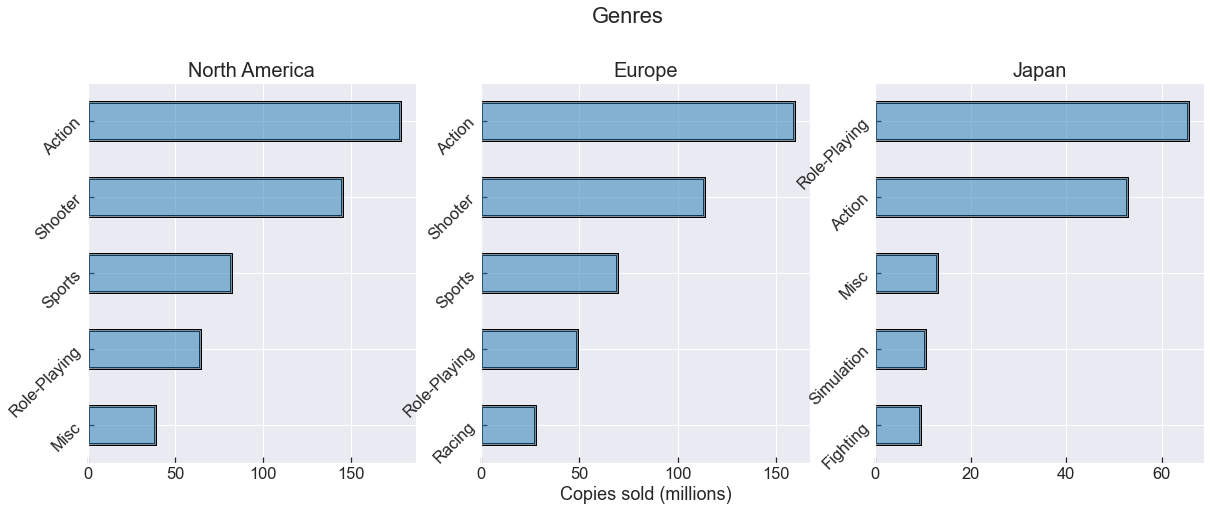

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

ax1, ax2, ax3 = axes

genres_top['na_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax1, edgecolor='k', fill=False, lw=3)
genres_top['na_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax1, rot=45, alpha=.5)
ax1.set_title('North America', fontsize=20)
ax1.set_ylabel(None)

genres_top['eu_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax2, edgecolor='k', fill=False, lw=3)
genres_top['eu_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax2, rot=45, alpha=.5)
ax2.set_title('Europe', fontsize=20)
ax2.set_xlabel('Copies sold (millions)')
ax2.set_ylabel(None)

genres_top['jp_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax3, edgecolor='k', fill=False, lw=3)
genres_top['jp_sales'].nlargest(5).sort_values(ascending=True).plot(kind='barh', ax=ax3, rot=45, alpha=.5)
ax3.set_title('Japan', fontsize=20)
# ax3.set_xlabel('Millions of copies')
ax3.set_ylabel(None)

fig.suptitle('Genres', fontsize=22, y=1.03)

plt.show()

- 